# Tugas 2 Diskritisasi

Diskritisasi juga disebut binning, yaitu merubah atribut numerik menjadi kategorikal. Digunakan untuk metode/model data mining yang tidak dapat menangani atribut numerik.

Carilah data yang bertipe numerik (data klassifikasi)  
1. Lakukan proses diskritisasi dengan equal width dan equal frequency  
2. Lakukan proses diskritisasi dengan basis entropy

Menggunakan Dataset Iris

In [ ]:
#Datasets iris
import pandas as pd
import numpy as np
import statistics as st
pd.options.mode.chained_assignment=None

url_iris='https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
data_iris=pd.read_csv(url_iris)
data_iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


**Diskritisasi dengan Equal-Width**
Membagi rentang dari *x* menjadi *k* rentang, dengan lebar sama. Yaitu dengan cara membagi lebar rentang dari *x* menjadi *k* 

In [ ]:
data_sepal_length =  data_iris[["sepal.length"]] #data frame
data_sepal_width =  data_iris[["sepal.width"]]
data_petal_length =  data_iris[["petal.length"]]
data_petal_width =  data_iris[["petal.width"]]

Method Cut yang digunakan untuk mencaari interval menggunakan metode Equal-Width-Intervals

In [ ]:
def cut(col,k):
  intervals=pd.cut(data_iris[col],k).value_counts().index.to_list() 
  return [[interval.left,interval.right] for interval in intervals]

In [ ]:
def toCategory(list_interval,col):
  #get length interval
  length = len(list_interval)

  #sorting interval
  sort_interval=np.sort(list_interval,axis=0)
  #get category from interval
  categories = np.array([chr(65+i) for i in range(length)])[:,None]
  #combine into interval data
  intervals = np.hstack((sort_interval,categories))

  #operate all data
  newCol=[]
  for i, row in data_iris.iterrows():
    data=row[col]
    for interval in intervals:
      if data >= interval[0].astype(float) and data <= interval[1].astype(float):
        newCol.append(interval[2])
        break

  #return new column category
  return np.array(newCol,dtype=str) 

Mencari interval sebagai contoh disini dibagi menjadi 3 bagian

In [ ]:
interval_sepal_length =  cut("sepal.length",3) #data frame
interval_sepal_width =  cut("sepal.width",3)
interval_petal_length =  cut("petal.length",3)
interval_petal_width =  cut("petal.width",3)

print("interval_sepal.length :",interval_sepal_length)
print("interval_sepal.width :",interval_sepal_width)
print("interval_petal.length :",interval_petal_length)
print("interval_petal.width :",interval_petal_width)

interval_sepal.length : [[5.5, 6.7], [4.296, 5.5], [6.7, 7.9]]
interval_sepal.width : [[2.8, 3.6], [1.998, 2.8], [3.6, 4.4]]
interval_petal.length : [[2.967, 4.933], [0.994, 2.967], [4.933, 6.9]]
interval_petal.width : [[0.9, 1.7], [0.0976, 0.9], [1.7, 2.5]]


Tampilan hasil dari pembagian category

In [ ]:
data_sepal_length["category"] = toCategory(interval_sepal_length,"sepal.length")
data_sepal_width["category"] = toCategory(interval_sepal_width,"sepal.width")
data_petal_length["category"] = toCategory(interval_petal_length,"petal.length")
data_petal_width["category"] = toCategory(interval_petal_width,"petal.width")

display(data_sepal_length)
display(data_sepal_width)
display(data_petal_length)
display(data_petal_width)

,sepal.length,category
0,5.1,A
1,4.9,A
2,4.7,A
3,4.6,A
4,5.0,A
...,...,...
145,6.7,B
146,6.3,B
147,6.5,B
148,6.2,B


,sepal.width,category
0,3.5,B
1,3.0,B
2,3.2,B
3,3.1,B
4,3.6,B
...,...,...
145,3.0,B
146,2.5,A
147,3.0,B
148,3.4,B


,petal.length,category
0,1.4,A
1,1.4,A
2,1.3,A
3,1.5,A
4,1.4,A
...,...,...
145,5.2,C
146,5.0,C
147,5.2,C
148,5.4,C


,petal.width,category
0,0.2,A
1,0.2,A
2,0.2,A
3,0.2,A
4,0.2,A
...,...,...
145,2.3,C
146,1.9,C
147,2.0,C
148,2.3,C


**Equal Frekuensi Interval**
Equal-frequency intervals adalah discretization yang membagi data numerik menjadi beberapa kelompok dengan jumlah anggota yang kurang lebih sama besar.

In [ ]:
data_sepal_length = data_iris[["sepal.length"]]
data_sepal_width = data_iris[["sepal.width"]]
data_sepal_length = data_iris[["petal.length"]]
data_petal_width = data_iris[["petal.width"]]

pandas menyediakan qcut ubtuk mencari nilai interval dari Equal-Frequency Intervals

In [ ]:
def qcut(col, k):
  intervals = pd.qcut(data_iris[col], k).value_counts().index.to_list()
  return [[interval.left, interval.right] for interval in intervals]

Mencari interval sebagai contoh disini dibagi menjadi 3 bagian

In [ ]:
interval_sepal_length =  qcut("sepal.length",3) #data frame
interval_sepal_width =  qcut("sepal.width",3)
interval_petal_length =  qcut("petal.length",3)
interval_petal_width =  qcut("petal.width",3)

print("interval_sepal.length :",interval_sepal_length)
print("interval_sepal.width :",interval_sepal_width)
print("interval_petal.length :",interval_petal_length)
print("interval_petal.width :",interval_petal_width)

interval_sepal.length : [[5.4, 6.3], [4.2989999999999995, 5.4], [6.3, 7.9]]
interval_sepal.width : [[1.999, 2.9], [2.9, 3.2], [3.2, 4.4]]
interval_petal.length : [[2.633, 4.9], [0.999, 2.633], [4.9, 6.9]]
interval_petal.width : [[0.867, 1.6], [0.099, 0.867], [1.6, 2.5]]


Menampilkan hasil pembagian category

In [ ]:
data_sepal_length["category"] = toCategory(interval_sepal_length,"sepal.length")
data_sepal_width["category"] = toCategory(interval_sepal_width,"sepal.width")
data_petal_length["category"] = toCategory(interval_petal_length,"petal.length")
data_petal_width["category"] = toCategory(interval_petal_width,"petal.width")

display(data_sepal_length)
display(data_sepal_width)
display(data_petal_length)
display(data_petal_width)

,petal.length,category
0,1.4,A
1,1.4,A
2,1.3,A
3,1.5,A
4,1.4,A
...,...,...
145,5.2,C
146,5.0,B
147,5.2,C
148,5.4,B


,sepal.width,category
0,3.5,C
1,3.0,B
2,3.2,B
3,3.1,B
4,3.6,C
...,...,...
145,3.0,B
146,2.5,A
147,3.0,B
148,3.4,C


,petal.length,category
0,1.4,A
1,1.4,A
2,1.3,A
3,1.5,A
4,1.4,A
...,...,...
145,5.2,C
146,5.0,C
147,5.2,C
148,5.4,C


,petal.width,category
0,0.2,A
1,0.2,A
2,0.2,A
3,0.2,A
4,0.2,A
...,...,...
145,2.3,C
146,1.9,C
147,2.0,C
148,2.3,C


**Entropy**
Entropi adalah nilai informasi yang menyatakan ukuran ketidakpastian(impurity) dari attribut dari suatu kumpulan obyek data dalam satuan bit

Entropy 

>*Entropy adalah*

>*   Rumus Entropy:



$$Entropy (D_{1}) = -\sum_{i=1}^{m} Pi \log_{2} Pi$$

>*   Rumus Gain:



$$Gain(E_{new}) = E_{initial} - E_{new}$$
>*   Rumus Info:



$$Info_{A}(D) = \frac{|D_{_{1}}|}{|D|} Entropy(D_{1}) + \frac{|D_{2}|}{|D|} Entropy(D_{2})$$

Membuat sample data untuk di analisis

In [ ]:
sample = data_iris[["sepal.length"]]
sample.describe()

,sepal.length
count,150.000000
mean,5.843333
std,0.828066
min,4.300000
25%,5.100000
50%,5.800000
75%,6.400000
max,7.900000


Membuat category random untuk semua data

In [ ]:
np.random.seed(0)
sample["category"] = np.where(np.random.choice(2,sample.shape[0]) < 1,"A","B")
sample

,sepal.length,category
0,5.1,A
1,4.9,B
2,4.7,B
3,4.6,A
4,5.0,B
...,...,...
145,6.7,A
146,6.3,B
147,6.5,B
148,6.2,B


Membuat fungsi GetOverollCategory (keseluruhan) yang digunakan untuk menghitung data keseluruhan yang nantinya digunakan untuk menghitung entropy

In [ ]:
def GetOverollCategory(col):
  group = sample.loc[:, :].groupby("category").count()
  a = group.loc["A", col]
  b = group.loc["B", col]
  return (a,b,a+b)

Fungsi splitter digunakan untuk membuat split antara value yang telah ditentukan lalu mengembalikan data yang telah dipisahkan

In [ ]:
def splitter(value, col):
  #get data less and greater from value
  less = sample[sample[col] <= value]
  greater = sample[sample[col] > value]

  #calculate into category for each data
  less_group = less.loc[:, :].groupby("category").count()
  greater_group = greater.loc[:, :].groupby("category").count()

  #get value based on category
  less_category_A = less_group.loc["A",col]
  less_category_B = less_group.loc["B",col]
  greater_category_A = greater_group.loc["A",col]
  greater_category_B = greater_group.loc["B",col]

  return (
      [less_category_A, less_category_B, less_category_A + less_category_B],
      [greater_category_A, greater_category_B, greater_category_A + greater_category_B]
  )

Buat fungsi entropy untuk mencari nilai entropy

In [ ]:
def entropy (d):
  r1 = (d[0] / d[2]) * np.log2(d[0] / d[2])
  r2 = (d[1] / d[2]) * np.log2(d[1] / d[2])
  return np.sum([r1, r2]) * -1

Membuat fungsi info dan gain

In [ ]:
def info(d):
  r1 = (d[0][2] / sample.shape[0]) * entropy(d[0])
  r2 = (d[1][2] / sample.shape[0]) * entropy(d[1])
  return r1 + r2

Fungsi gain untuk menghitung selisih antara entropy awal dengan yang baru

In [ ]:
def gain(Einitial, Enew):
  return Einitial - Enew


Membuat Dinitial

In [ ]:
D = GetOverollCategory("sepal.length")
entropy_d = entropy(D)
print(D)
print(entropy_d)

(68, 82, 150)
0.993707106604508


Melakukan beberapa tes split untuk menari informasi yang terbaik

**Split 1 : 4.4**

In [ ]:
split1 = splitter(4.4, "sepal.length")
info_split1 = info(split1)
gain(entropy_d, info_split1)

0.003488151753460178

**Split 2 : 5.5**

In [ ]:
split2 = splitter(5.5, "sepal.length")
info_split2 = info(split2)
gain(entropy_d, info_split2)

0.012302155146638905

**Split 3 : 7.0**

In [ ]:
split3 = splitter(7.0, "sepal.length")
info_split3 = info(split3)
gain(entropy_d, info_split3)

0.0005490214732508658

Split terbaik yaitu split 3 yang memberikan keuntungan informasi sebesar 0.0005490214732508658 karena yang paling rendah

# Modelling Klasifikasi-Implementasi KNN 

KNN (K-Nearest Neighbor) adalah algoritma klasifikasi terawasi sederhana yang dapat kita gunakan untuk menetapkan kelas ke titik data baru. 


Implementasi KNN pada dataset iris menggunakan scikit-learn library. Dataset Iris memiliki 50 sampel untuk setiap spesies bunga Iris yang berbeda (total 150). Untuk setiap sampel kami memiliki panjang sepal, lebar dan panjang dan lebar kelopak dan nama spesies (kelas/label).

Bunga iris memiliki: panjang sepal, lebar sepal, panjang dan lebar kelopak


Algoritma KNN, yaitu:  
1. Menentukan Nilai K  
2. Menghitung jarak data uji dengan data latih  
3. Mengurutkan jarak berdasarkan kecil ke besar  
4. Mengambil data sebanyak k terdekat, yaitu memilik k terdekat (tetangga terdekat)
5. Memilih Class mayor

In [ ]:
# Data in a csv format, each observation has a 4 measurements/features 
# and the species type.
from IPython.display import IFrame
IFrame('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', width=400, height=200)

**Langkah 1 : Import data yang diperlukan dan memeriksa fitur - fiturnya**

Impor fungsi load_iris dari modul dataset scikit-learen dan buat objek iris Bunch (bunch adalah tipe objek khusus scikitlearn untuk menyimpan dataset dan atributnya).

In [ ]:
#import the load_iris function from dataset module
from sklearn.datasets import load_iris

In [ ]:
#Create bunch object containing iris dataset and its attributes.
iris = load_iris()

In [ ]:
type(iris)

sklearn.utils.Bunch

In [ ]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

Pada setiap pengamatan mewakili 1 bunga, dan 4 kolom mewakili 4 pengukuran. 

Fitur (ukuran) untuk melihat atribut data

In [ ]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


Label/respons dikodekan sebagai 0,1 dan 2. Karena fitur dan repose harus numerik (Numpy arrays) untuk model scikit-learn dan mereka harus memiliki bentuk tertentu.  
0 : setosa, 1 : versicolor, 2 : virginica

In [ ]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [ ]:
print(type(iris.data))
print(type(iris.target))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


Memiliki 150 observasi dan 4 fitur

In [ ]:
print(iris.data.shape)

(150, 4)


In [ ]:
# Feature matrix in a object named X
X = iris.data
# response vector in a object named y
y = iris.target

In [ ]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


Step2: Pisahkan Data Uji dan Latih Modelnya

Fungsi **train_test_split** adalah fungsi untuk membagi data.  
Parameter opsional **test-size** digunakan untuk menentukkan presentase pemisahan.  
Parameter **random_state**, jika mengeksekusi kode, maka nilai acak baru dihasilkan dan dataset train dan test akan memiliki nilai yang berbeda setiap kali.   
Akurasi pengujian yang dihasilkan akan menjadi perkiraan yang lebih baik tentang seberapa baik kemungkinan model untuk tampil pada data yang tidak terlihat.

In [ ]:
# splitting the data into training and test sets (80:20)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [ ]:

#shape of train and test objects
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


In [ ]:
# shape of new y objects
print(y_train.shape)
print(y_test.shape)

(120,)
(30,)


Impor kelas **KNeighborsClassifer** dari modul **neighbors** dan Instansiasi estimator (**estimator** adalah istilah scikit-learn untuk model). Disebut model sebagai estimator karena peran utama mereka adalah untuk memperkirakan jumlah yang tidak diketahui.  
Parameter **n_neighbors** adalah parameter tuning/parameter hyper (k) . Semua parameter lainnya diatur ke nilai default.  
Metode **fit** digunakan untuk melatih model pada data training (X_train,y_train) dan metode **predict** untuk melakukan pengujian pada data testing (X_test).   
Memilih nilai K yang optimal sangat  itu penting, jadi kami menyesuaikan dan menguji model untuk nilai yang berbeda untuk K (dari 1 hingga 25) menggunakan for loop dan mencatat akurasi pengujian KNN dalam variabel (skor).

In [ ]:
#import the KNeighborsClassifier class from sklearn
from sklearn.neighbors import KNeighborsClassifier

#import metrics model to check the accuracy 
from sklearn import metrics
#Try running from k=1 through 25 and record testing accuracy
k_range = range(1,26)
scores = {}
scores_list = []
for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train,y_train)
        y_pred=knn.predict(X_test)
        scores[k] = metrics.accuracy_score(y_test,y_pred)
        scores_list.append(metrics.accuracy_score(y_test,y_pred))

Plot hubungan antara nilai K dan akurasi pengujian yang sesuai menggunakan pustaka matplotlib.  
Terdapat kenaikan dan penurunan dalam akurasi dan itu cukup khas ketika memeriksa kompleksitas model dengan akurasi. Secara umum seiring dengan kenaikan nilai K tampaknya ada peningkatan akurasi dan lagi-lagi turun.  
Untuk KNN kompleksitas model ditentukan oleh nilai K. Nilai K yang lebih besar menyebabkan batas keputusan yang lebih halus (model yang kurang kompleks). K yang lebih kecil mengarah ke model yang lebih kompleks (dapat menyebabkan overfitting).

Text(0, 0.5, 'Testing Accuracy')

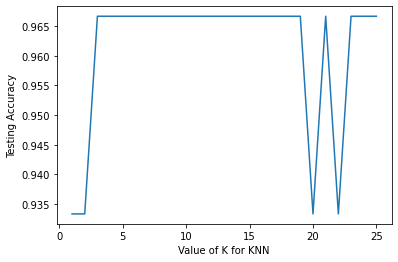

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

#plot the relationship between K and the testing accuracy
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X,y)

KNeighborsClassifier()

In [ ]:
#0 = setosa, 1=versicolor, 2=virginica
classes = {0:'setosa',1:'versicolor',2:'virginica'}

#Making prediction on some unseen data 
#predict for the below two random observations
x_new = [[3,4,5,2],
         [5,4,2,2]]
y_predict = knn.predict(x_new)

print(classes[y_predict[0]])
print(classes[y_predict[1]])

versicolor
setosa
